In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import struct

In [7]:
import seaborn as s
from matplotlib.colors import LogNorm
s.set(rc={'image.cmap': "jet"})
rcParams['savefig.dpi'] = 160
figsize(8,3)
rcParams['figure.facecolor'] = (1,1,1,1)
rcParams['savefig.facecolor'] = (1,1,1,1)

def plot_matrix(frame, **args):
    x,y = np.meshgrid(np.array(frame.index,   dtype=float),
                      np.array(frame.columns, dtype=float))
    z = frame.T.values.astype(float)
    ret = gca().pcolor(y,x,z, **args)
    (lambda x: xlim(x[0],x[-1]))(frame.columns)
    (lambda x: ylim(x[0],x[-1]))(frame.index  ) 
    return ret

In [4]:
import glob
directory = "/data/MCMCG/"
files = sorted( glob.glob(directory + "par*.bin"), 
                key=lambda x:int(x.split("/")[-1][3:].split('_')[0]))
grfls = sorted( glob.glob(directory + "grad*.bin"), 
                key=lambda x:int(x.split("/")[-1][4:].split('_')[0]))

bins = []
for line in open("/data/MCMCG/metadata.txt","r"):
    line = line.split()
    if line[0] == "bins": 
        bins = map(float, line[1:])

In [19]:
with open("/data/MCMCG/lik_chunk0.bin", "rb") as f: 
    size = int(struct.unpack('<i', f.read(4))[0])
    likelihood = np.fromfile(f,np.float32)
likelihood = pd.DataFrame(lik)

In [5]:
def get_and_split(files):
    data = {}
    for fname in files:
        with open(fname, "rb") as f: 
            size = int(struct.unpack('<i', f.read(4))[0])
            data[fname] = np.fromfile(f,np.float32)

    data = pd.DataFrame(data)[files]
    dataP = data.iloc[:,:len(data.columns)/2]
    dataP.columns = bins[:-1]
    dataD = data.iloc[:,len(data.columns)/2:]
    dataD.columns = bins[:-1]
    return dataP, dataD

dataP, dataD = get_and_split(files)
gradP, gradD = get_and_split(grfls)

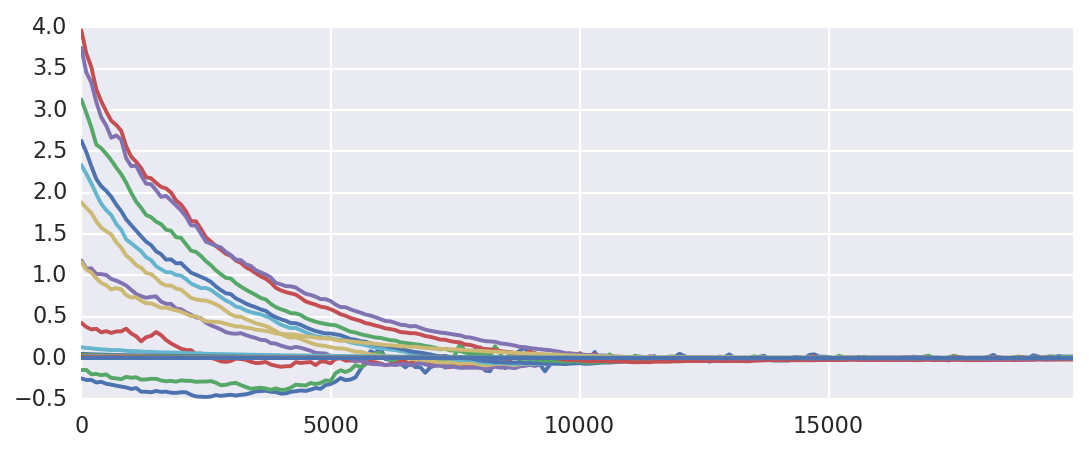

In [14]:
gradD.iloc[:20000:100].plot(legend=False)

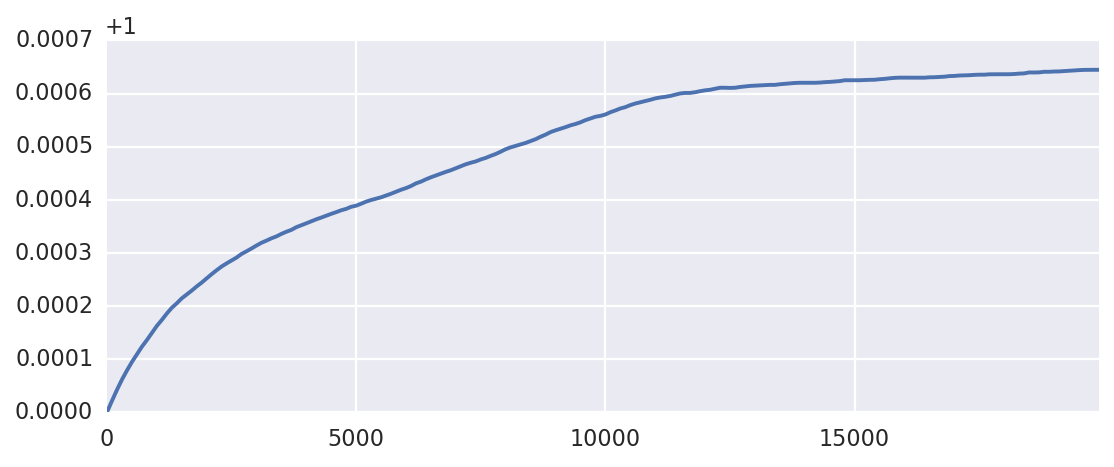

In [44]:
pd.DataFrame({
    "Likelihood": likelihood.iloc[:,0],
    "$\\int\\; Grad\\cdot \\Delta x$": (likelihood.iloc[0,0] + np.cumsum(integr.dropna()))
}).iloc[:20000:100].plot()

 

In [35]:
likelihood.iloc[0,0]

36793456.0